In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM


In [7]:
df=pd.read_csv('/content/nifty 50 jan2010-jun2019 cleaned.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-7-634d853e5857>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('/content/nifty 50 jan2010-jun2019 cleaned.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
2010-05-01,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2010-06-01,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
2010-07-01,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
2010-08-01,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [8]:
df = df.dropna()

print(df.isnull().sum())
print(len(df))

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
2321


In [10]:
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (2321, 6)
Null Value Present:  False


In [11]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [12]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-04-01,0.077764,0.082260,0.085080,0.0
2010-05-01,0.088027,0.088932,0.095154,0.0
2010-06-01,0.088162,0.091940,0.097516,0.0
2010-07-01,0.088653,0.090830,0.095469,0.0
2010-08-01,0.086291,0.087381,0.094124,0.0


In [13]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [14]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [17]:
from keras.utils import plot_model

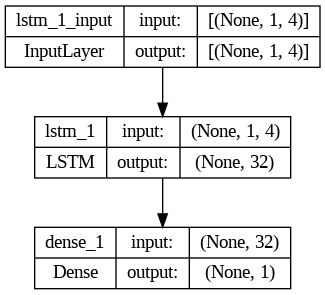

In [18]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [19]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
264/264 [==============================] - 3s 3ms/step - loss: 55115852.0000
Epoch 2/100
264/264 [==============================] - 1s 4ms/step - loss: 54961260.0000
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 54664864.0000
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 54249932.0000
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 53733460.0000
Epoch 6/100
264/264 [==============================] - 1s 3ms/step - loss: 53128728.0000
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 52445564.0000
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 51691760.0000
Epoch 9/100
264/264 [==============================] - 1s 3ms/step - loss: 50873804.0000
Epoch 10/100
264/264 [==============================] - 1s 2ms/step - loss: 49997300.0000
Epoch 11/100
264/264 [==============================] - 1s 2ms/step - loss: 49067260.0000
Epoch 12/100
264/26

In [20]:
y_pred= lstm.predict(X_test)

7/7 [==============================] - 1s 6ms/step


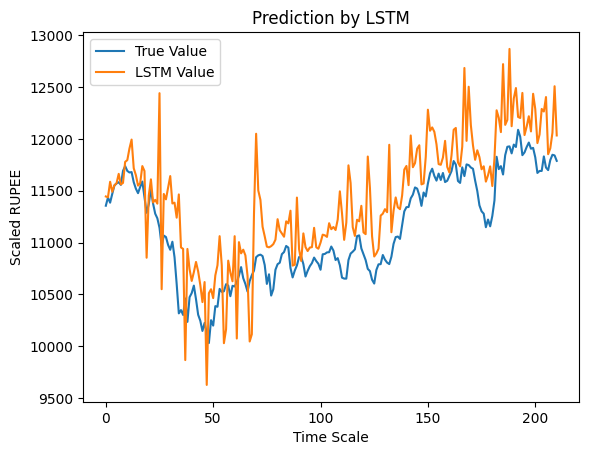

In [23]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled RUPEE')
plt.legend()
plt.show()